In [1]:
import scanpy as sc
import os
import pandas as pd
import matplotlib as mpl
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp

%reload_ext autoreload
%autoreload 2

mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/wsfish/glioblastoma/FISHspace/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)
/tmp/ipykernel_2606083/3614471734.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seabor

# Full Data

In [3]:
adata_full = sc.read_h5ad('../OrganoidAnalysis/integration/GBMOrganoids_scVIsurgery20240408.h5ad')

In [4]:
adata_full.obs

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,...,leiden_1.1,leiden_1.2,leiden_1.3,leiden-bbknn_1.1,leiden-bbknn_1.05,leiden-bbknn_1.2,leiden-bbknn_1.15,leiden-bbknn_1.3,annotation_20240402,annotation_20240408
aaaocedi-1-0,aaaocedi-1,828.616821,720.303223,281,0,0,0,0,281,96.950472,...,8,8,8,3,8,11,4,11,+HR1,+HYP1
aadidjpi-1-0,aadidjpi-1,845.581909,721.379333,271,0,0,0,0,271,105.394691,...,4,3,11,3,5,11,6,11,+HR1,+HYP1
aaeaihbj-1-0,aaeaihbj-1,820.322021,724.660339,175,0,0,1,1,177,70.082503,...,8,8,8,11,8,12,6,12,+HR2,rAC
aaggikdb-1-0,aaggikdb-1,824.630554,730.077209,167,0,0,0,0,167,60.464221,...,4,3,4,3,0,11,4,11,+HR1,+HYP1
aagiopif-1-0,aagiopif-1,852.391968,735.970764,566,0,0,0,0,566,202.570945,...,4,3,4,3,0,2,4,3,+HYP2,+HYP1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
oipccffl-1-39,oipccffl-1,898.491821,966.650879,1283,0,0,1,0,1284,203.654695,...,5,5,5,2,6,3,7,2,RG,RG
oipkdfcd-1-39,oipkdfcd-1,881.941101,1008.092224,687,0,0,2,0,689,150.867037,...,8,8,8,1,3,7,0,8,AC,preOPC
ojanojof-1-39,ojanojof-1,887.999939,1016.754944,1179,0,1,1,1,1182,239.915165,...,3,2,2,1,3,1,5,1,preOPC,preOPC
ojapbbll-1-39,ojapbbll-1,895.648621,1014.861145,174,0,0,0,0,174,26.371251,...,3,2,2,1,3,1,5,1,preOPC,preOPC


In [5]:
# I lost at some point during analysis the count matrix. Rescues using cellIDs
#adata_full.obs.index
'''adata_original = sc.read_h5ad('../OrganoidAnalysis/SL_OrganoidExperiment.h5ad')
counts = adata_original[adata_full.obs.index,:].X
adata_full.layers['counts'] = counts.copy()
adata_raw = adata_full.copy()
adata_raw.X = counts.copy()
adata_full.raw = adata_raw
#adata_full.write_h5ad('../OrganoidAnalysis/integration/GBMOrganoids_scVIsurgery20240402.h5ad')'''

"adata_original = sc.read_h5ad('../OrganoidAnalysis/SL_OrganoidExperiment.h5ad')\ncounts = adata_original[adata_full.obs.index,:].X\nadata_full.layers['counts'] = counts.copy()\nadata_raw = adata_full.copy()\nadata_raw.X = counts.copy()\nadata_full.raw = adata_raw\n#adata_full.write_h5ad('../OrganoidAnalysis/integration/GBMOrganoids_scVIsurgery20240402.h5ad')"

In [6]:
annotation_colors = {
    '+HYP2':'#840034',
    'preOPC': '#7befb2',
    'RG':'#ff9470',
    '+HYP1':'#C50F53',
    'AC1':'#2ecc71',
    'nIPC':'#FFF192',
    'OPC':'#89c4f4',
    'GBL':'#b9e670',
    'hAC':'#EDE8F3',
    'AC2':'#2ecc71',
    'FBL':'#9f5afd',
    'rAC':'#e3ba8f',
    'cOPC':'#038aff',
    'Unknown':'#efeff0',
}

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Paramet

<Figure size 500x500 with 0 Axes>

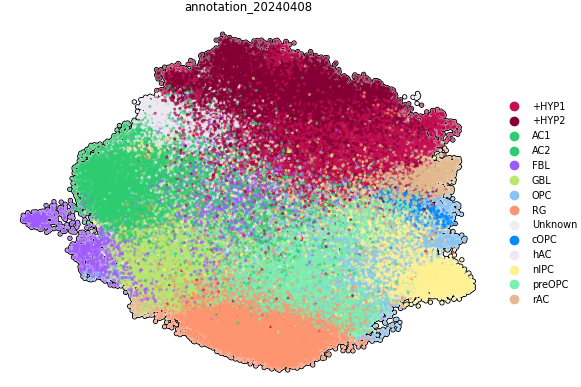

In [11]:
plt.figure(figsize=(5,5))
sc.pl.umap(
    adata_full,
    color=["annotation_20240408"],
    frameon=False,
    add_outline=True,
    ncols=4,
    s=20,
    show=False,
)
plt.savefig('../ExtendedFigure6/figures/GBO_scVI.png',transparent=True,format='png', dpi=300)
plt.show()

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


<Axes: title={'center': 'COL3A1'}, xlabel='UMAP1', ylabel='UMAP2'>

<Figure size 500x500 with 0 Axes>

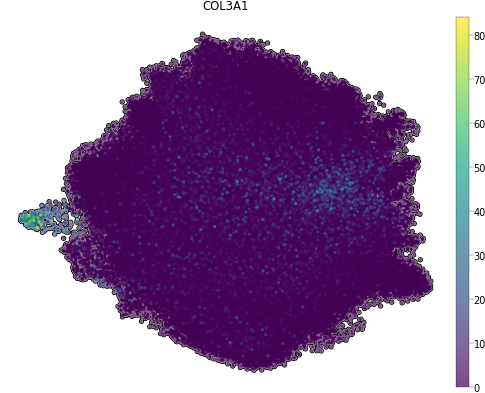

In [43]:
plt.figure(figsize=(5,5))
sc.pl.umap(
    adata_full,
    color=["COL3A1"],
    frameon=False,
    add_outline=True,
    ncols=4,
    s=20,
    show=False,
)


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


[<Axes: title={'center': 'COL3A1'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'SOX10'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'PDGFRA'}, xlabel='UMAP1', ylabel='UMAP2'>]

<Figure size 500x500 with 0 Axes>

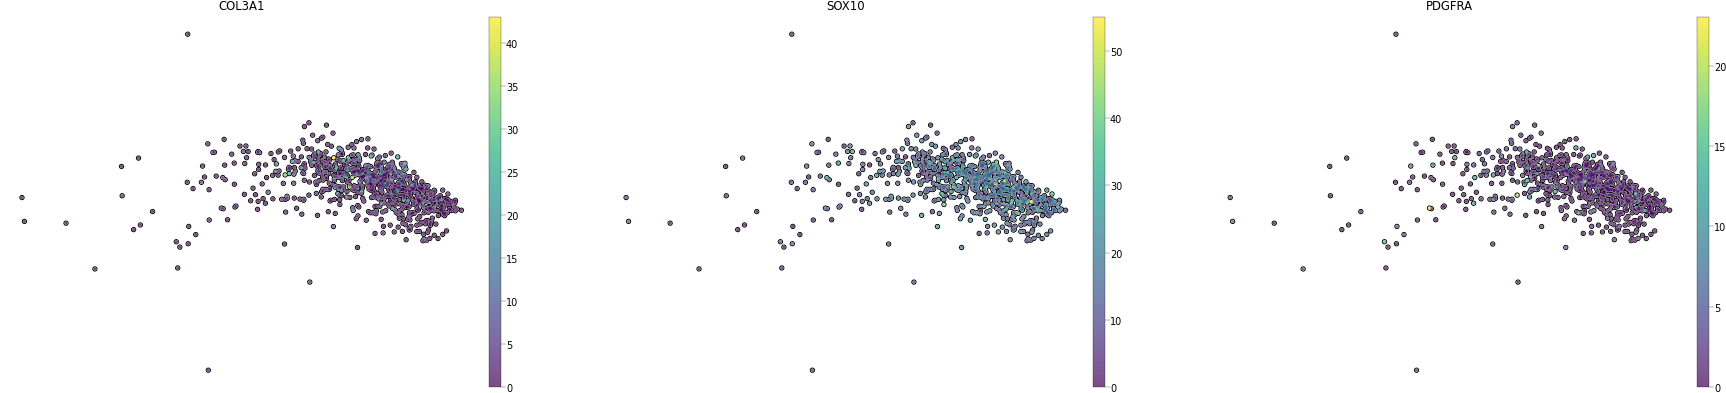

In [103]:
plt.figure(figsize=(5,5))
sc.pl.umap(
    adata_full[adata_full.obs['annotation_20240408'].isin(['cOPC'])],
    color=["COL3A1","SOX10", "PDGFRA"],
    frameon=False,
    add_outline=True,
    ncols=4,
    s=20,
    show=False,
)


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


[<Axes: title={'center': 'COL3A1'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'SOX10'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'PDGFRA'}, xlabel='UMAP1', ylabel='UMAP2'>]

<Figure size 500x500 with 0 Axes>

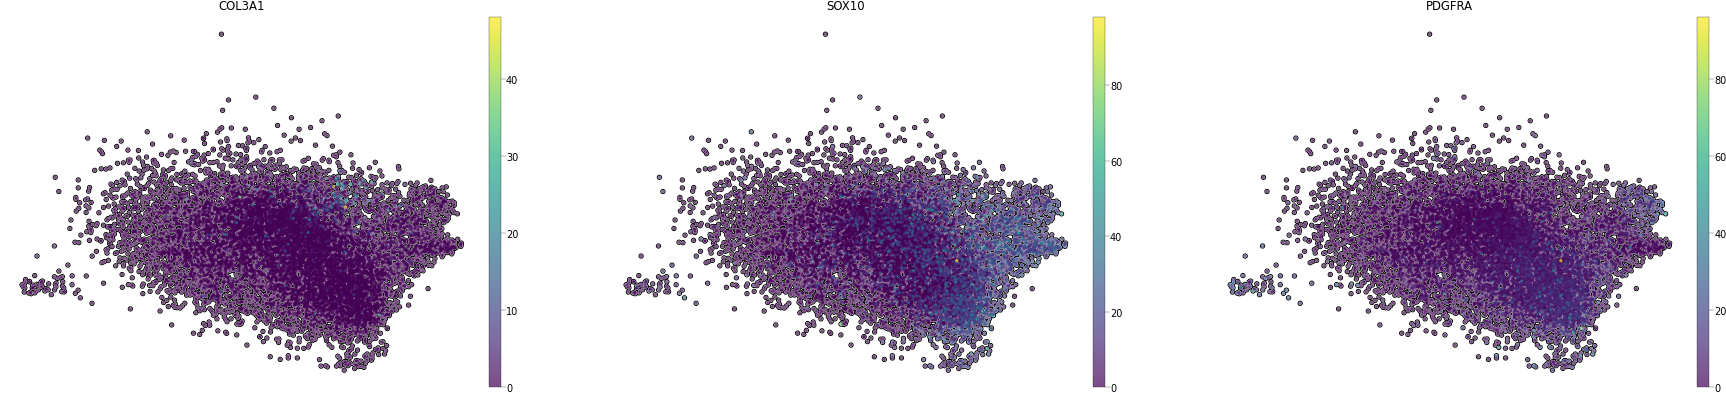

In [56]:
plt.figure(figsize=(5,5))
sc.pl.umap(
    adata_full[adata_full.obs['annotation_20240408'].isin(['OPC'])],
    color=["COL3A1","SOX10", "PDGFRA"],
    frameon=False,
    add_outline=True,
    ncols=4,
    s=20,
    show=False,
)


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


[<Axes: title={'center': 'SOX10'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'DCN'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'PDGFRA'}, xlabel='UMAP1', ylabel='UMAP2'>]

<Figure size 500x500 with 0 Axes>

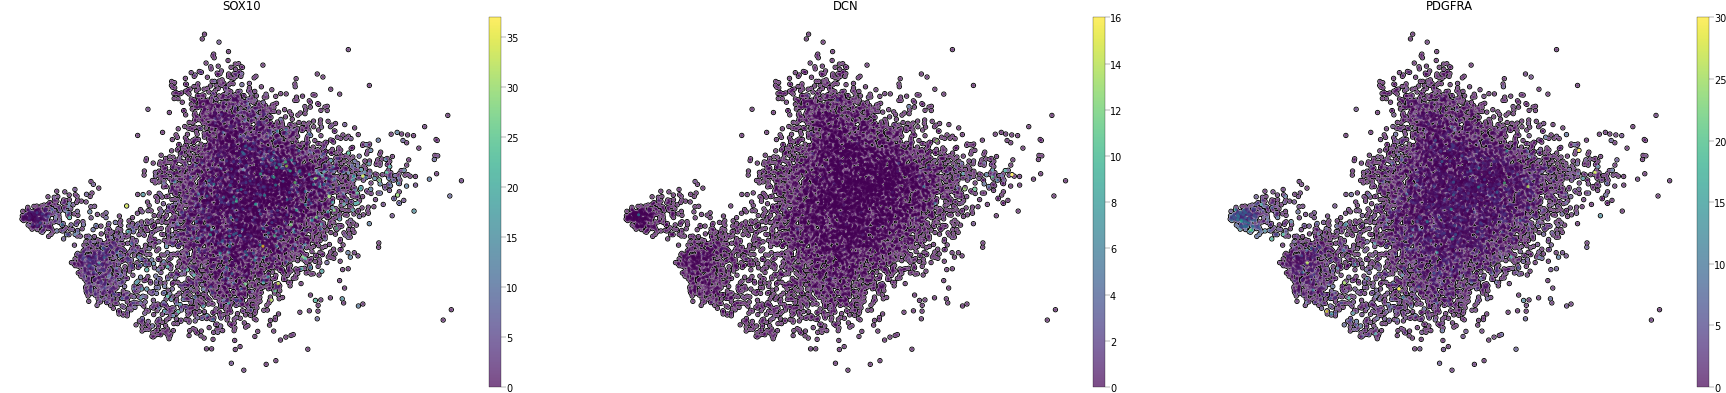

In [55]:
plt.figure(figsize=(5,5))
sc.pl.umap(
    adata_full[adata_full.obs['annotation_20240408'].isin(['FBL'])],
    color=["SOX10",'DCN','PDGFRA'],
    frameon=False,
    add_outline=True,
    ncols=4,
    s=20,
    show=False,
)

In [85]:
FBL = adata_full[adata_full.obs['annotation_20240408'].isin(['FBL'])]
OPC = adata_full[adata_full.obs['annotation_20240408'].isin(['OPC'])]

In [87]:
FBL[:,'COL3A1'].X.mean()

1.592324

In [88]:
OPC[:,'COL3A1'].X.mean()

0.23284185

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.tl.rank_genes_groups(adata_full, groupby="annotation_20240408", method='t-test')
sc.pl.rank_genes_groups(adata_full)

# Heatmap

In [117]:
adata = adata_full[adata_full.obs['annotation_20240408'] != 'Unknown'].copy()
adata.X = adata.raw.X
adata.X.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 8., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 6., 0., ..., 0., 0., 0.]], dtype=float32)

In [118]:
adata.X = adata.X.toarray()

In [119]:
sp.pp.preprocess(
    adata,
    batch_key='line',
    batch_correction=False,
    scaling=True,
    keep_raw=False,
    max_quant=.95
)

In [152]:
marker_genes_dict = {
    'GBL':['TTYH1', 'EDNRB', 'BCAN', 'TNC'],
    'OPC':['PDGFRA', 'SOX10','OLIG1', 'OLIG2'],
    'nIPC':['ASCL1','ST18'],
    'RG':['HES1', 'PAX6', 'PCNA'],
    'preOPC':['EGFR', 'DLL3'],
    
    'AC1': ['AQP4','GJA1'],
    'AC2':['GFAP','NES'],
    
    'FBL':['COL3A1','COL1A1'],
    'rAC': ['SERPINE1', 'SERPINA3','CHI3L1','APOE', 'MGST1'],
    'cOPC':['UGT8','PLP1','MOG'],
    'hAC':['SPP1','CST3'],
    '+HYP1': ['CD44', 'ANXA1', 'EPAS1', 'ANXA2'],
    '+HYP2':['CRYAB','MDM2','VEGFA','HILPDA'],


    
}

In [153]:
#import itertools
#markers = list(itertools.chain.from_iterable(marker_genes_dict.values()))

In [154]:
sc.tl.dendrogram(adata, groupby="annotation_20240408")

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 51 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'Q

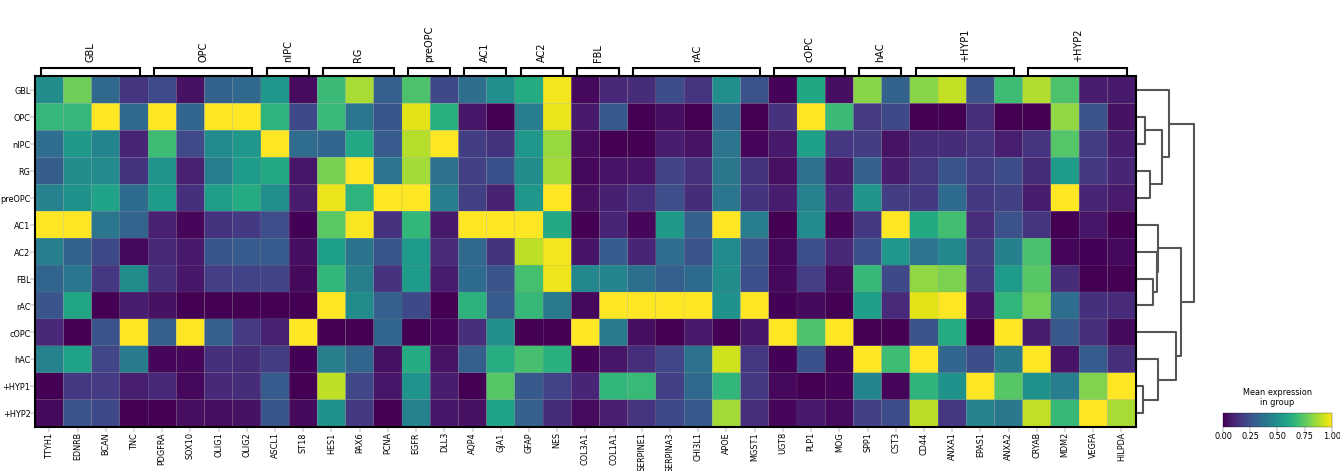

In [155]:
sc.pl.matrixplot(
    adata,#[adata_full.obs.line == 'SL013'],
    marker_genes_dict,
    "annotation_20240408",
    dendrogram=True,
    standard_scale='var',
    #colorbar_title="mean z-score",
    log=True,
    use_raw=False,
    #layer="counts",
    #vmin=-2,
    #vmax=.9999,
    #save='../ExtendedFigure6/figures/Heatmap_GBO.pdf',
    show=False,
    cmap="viridis",
)
plt.savefig('../ExtendedFigure6/figures/Heatmap_GBO.pdf',dpi=300, transparent=True,)
plt.show()


In [110]:
'''
adata_full.X = adata_full.raw.X
adata = adata_full.copy()
adata.X = adata.raw.X
adata.X.toarray()
'''

'\nadata_full.X = adata_full.raw.X\nadata = adata_full.copy()\nadata.X = adata.raw.X\nadata.X.toarray()\n'

In [111]:
#X = adata.X
#adata.X = (adata.X / adata.obs.cell_area.values[:,np.newaxis]) * 10000
#sc.pp.log1p(adata)

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


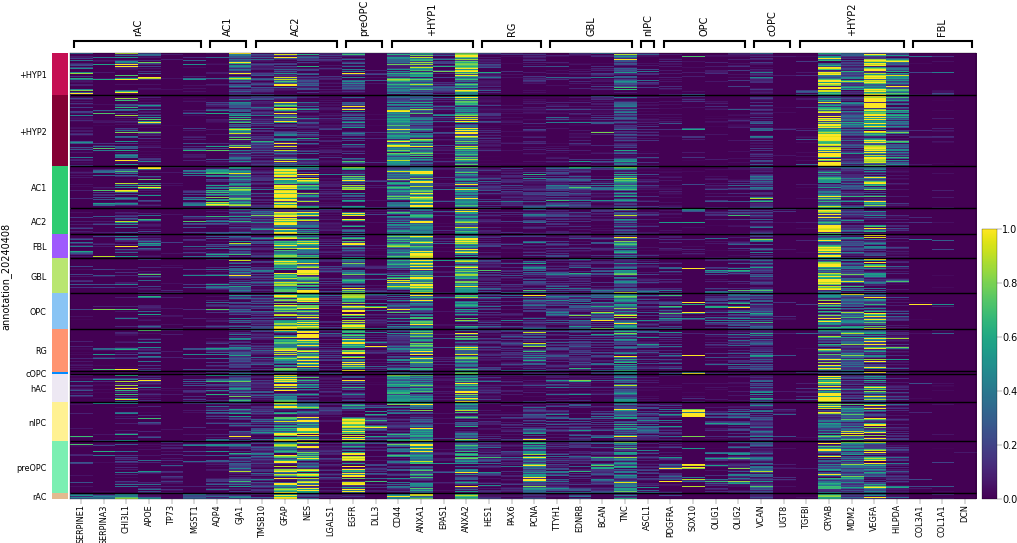

In [114]:

sc.pl.heatmap(
    adata, 
    marker_genes_dict, 
    groupby="annotation_20240408", 
    cmap="viridis", 
    standard_scale='obs',
    #dendrogram=True,
    use_raw=False,
    #vmax=.5,
    #log=True,
    #vmax=1,
)

